In [1]:
import pandas as pd

import xfirst

Welcome to JupyROOT 6.28/04


### Compute extremes

In [2]:
limits = []

for cut in xfirst.config.cuts:
  fits = xfirst.data.load_fits('data', cut = cut, datasets = 'train', drop_bad = True)
  fits['stat'] = fits['chi2']/fits['ndf']
  limits += [fits.max(), fits.min()]

limits = pd.DataFrame(limits)
limits = {c: (a, b) for c, a, b in zip(limits.columns, limits.min(), limits.max())}

### Draw loop

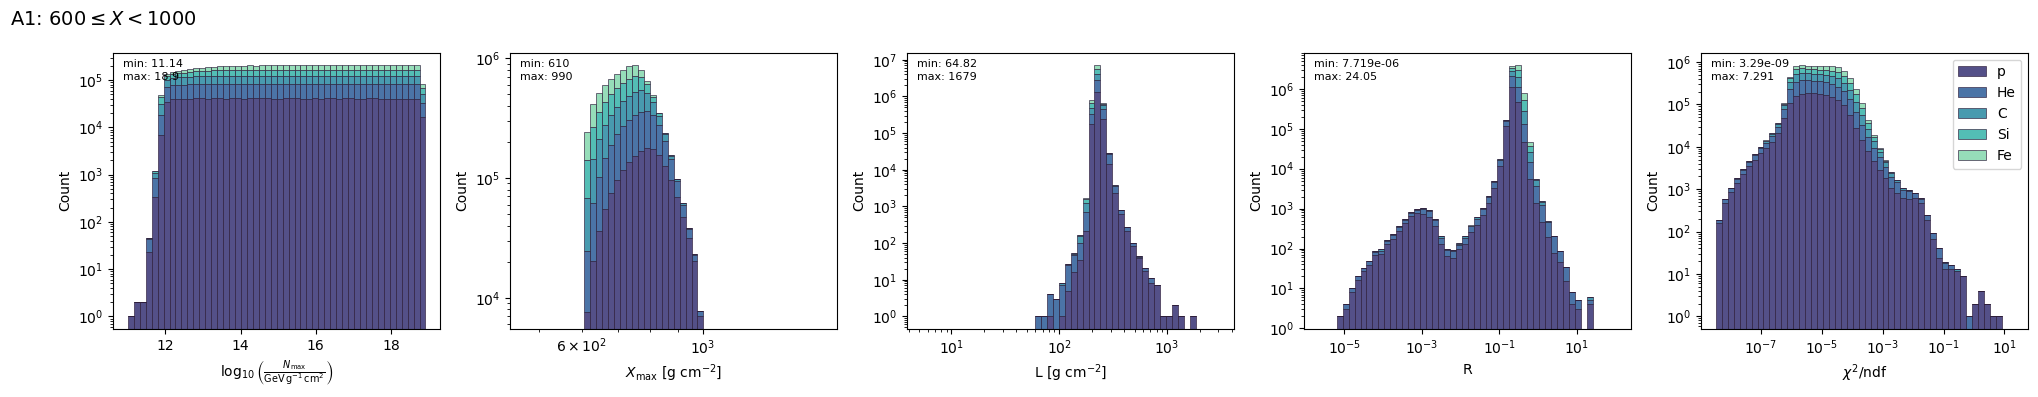

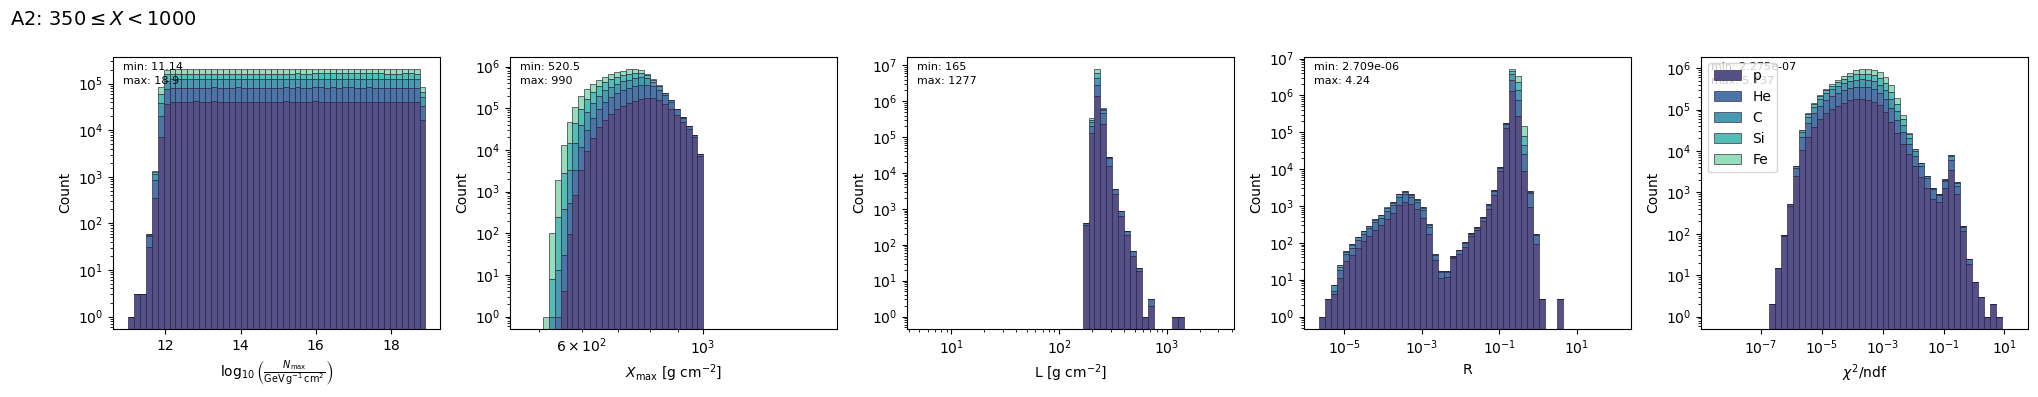

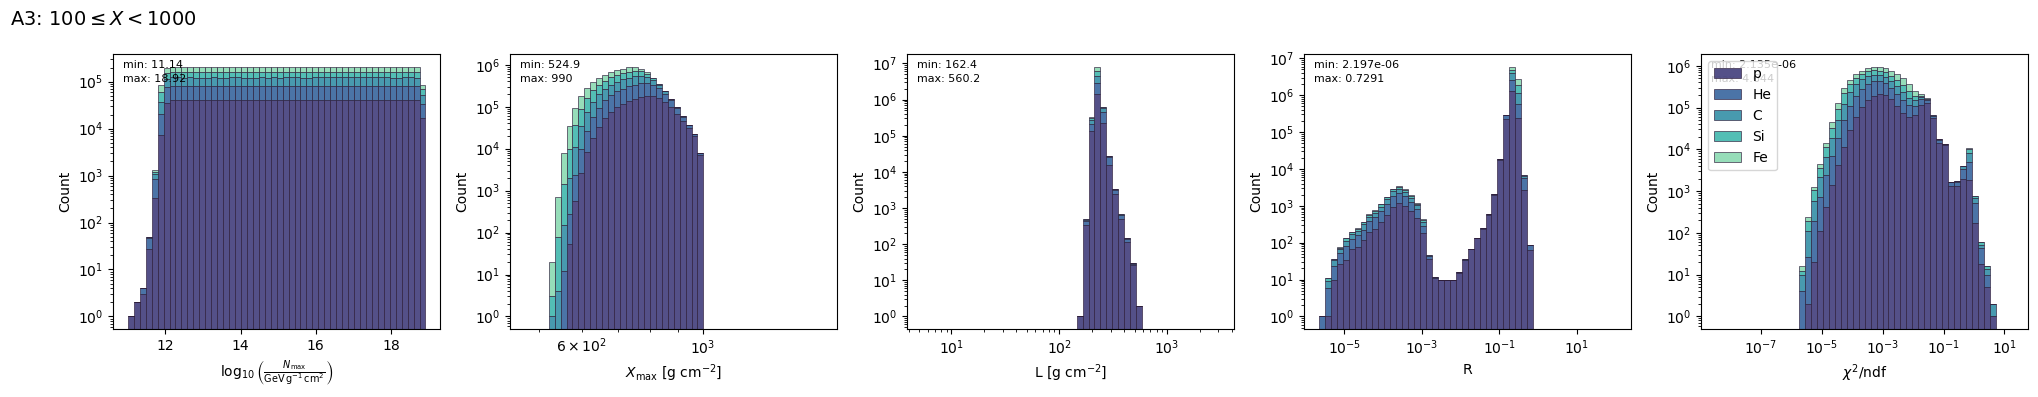

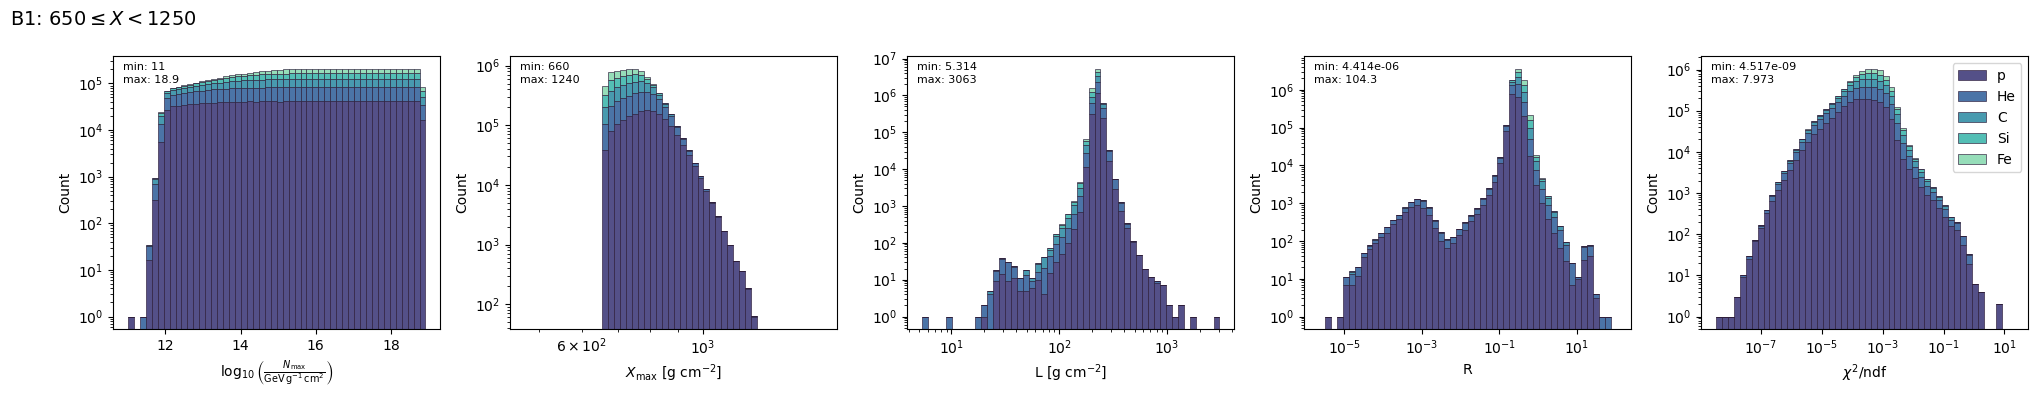

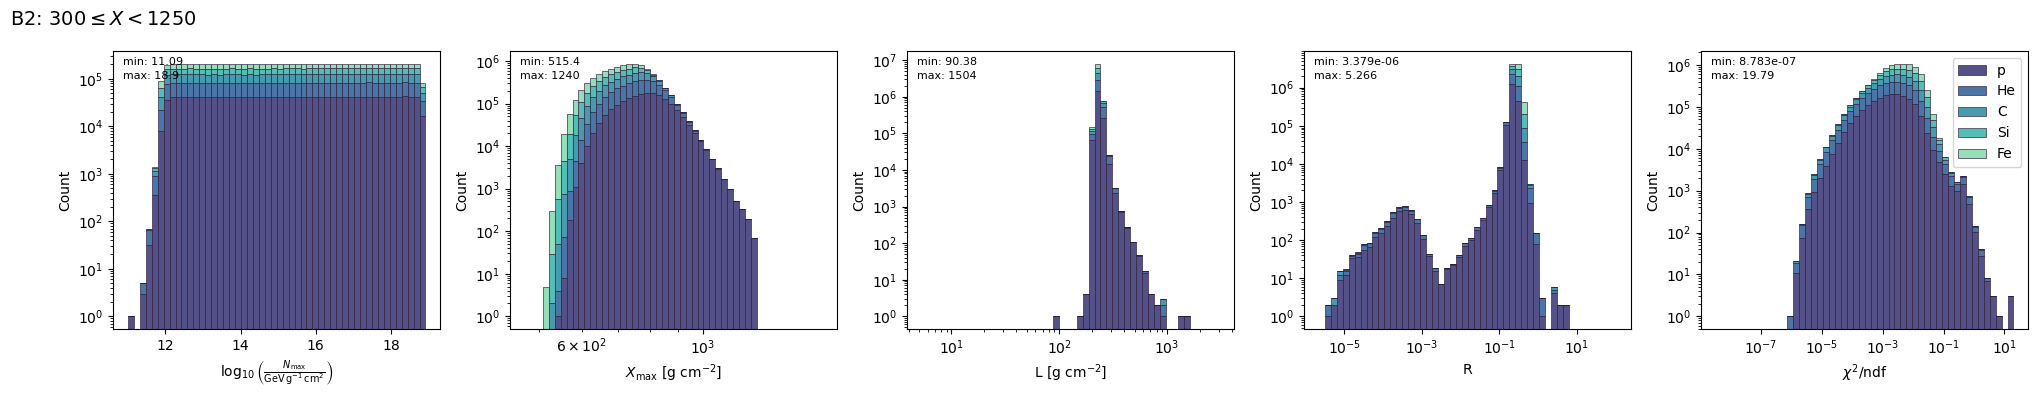

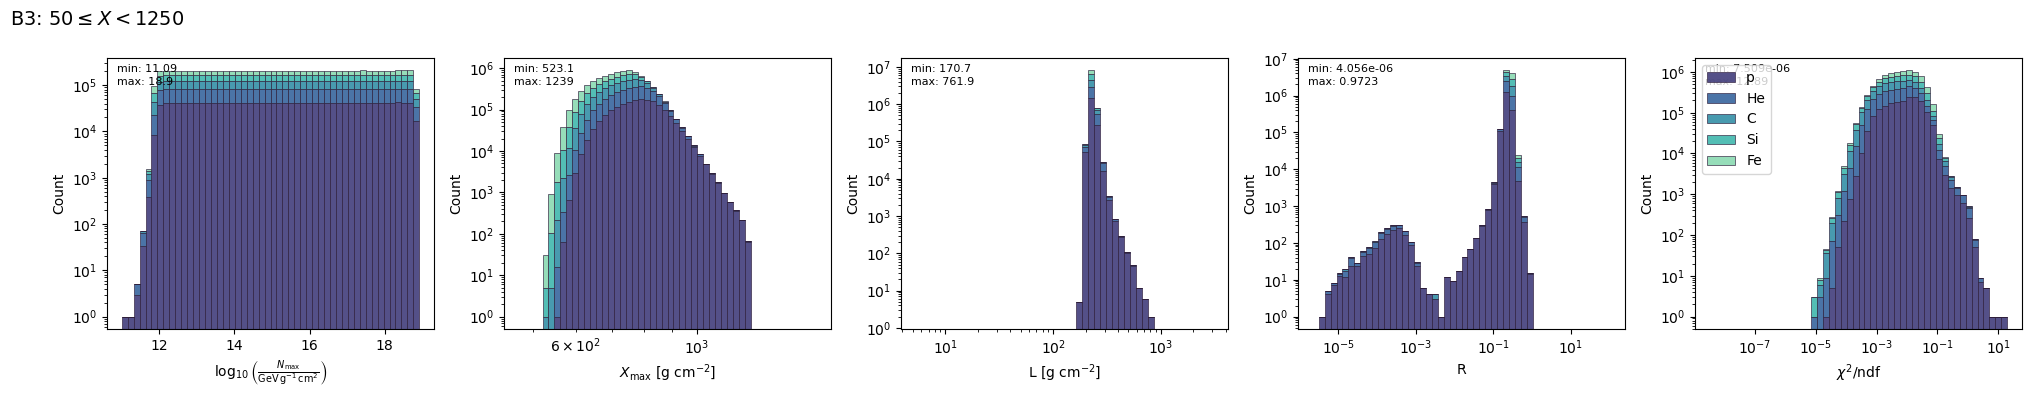

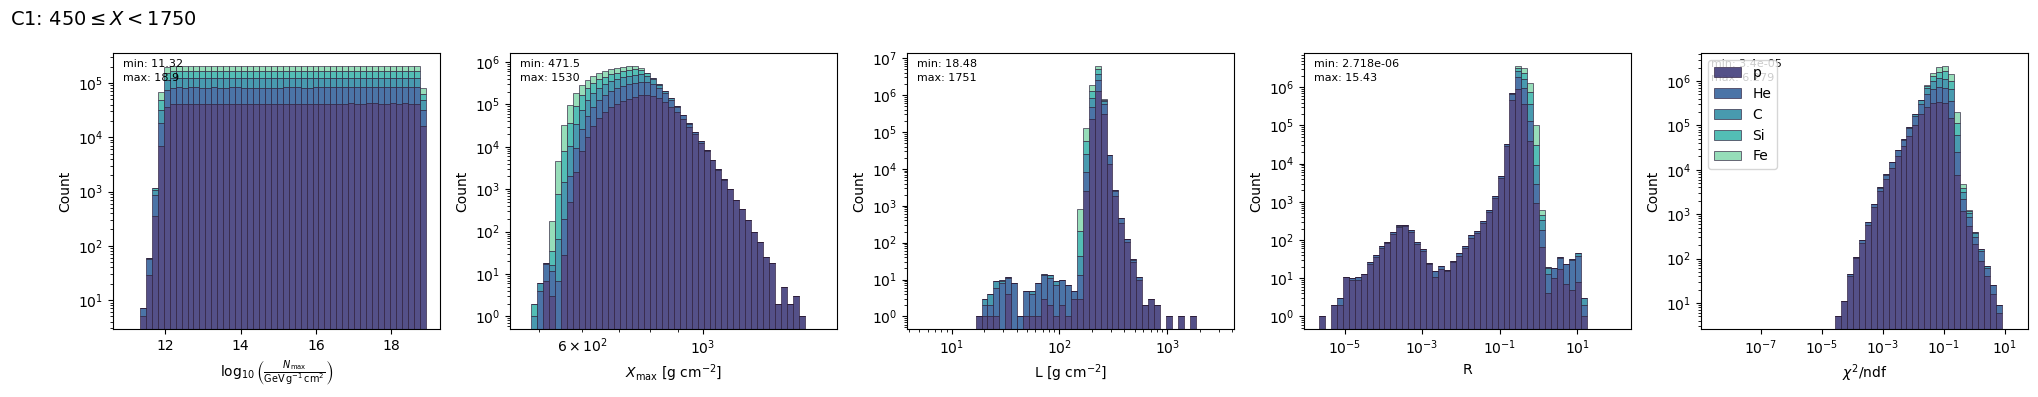

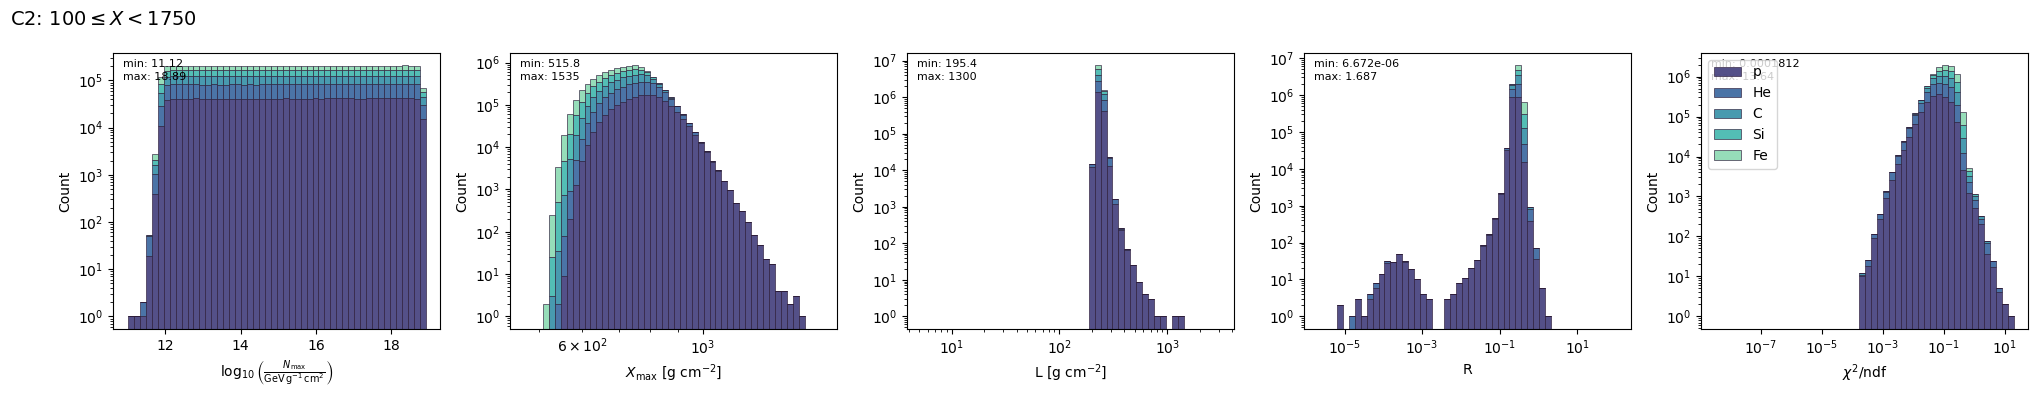

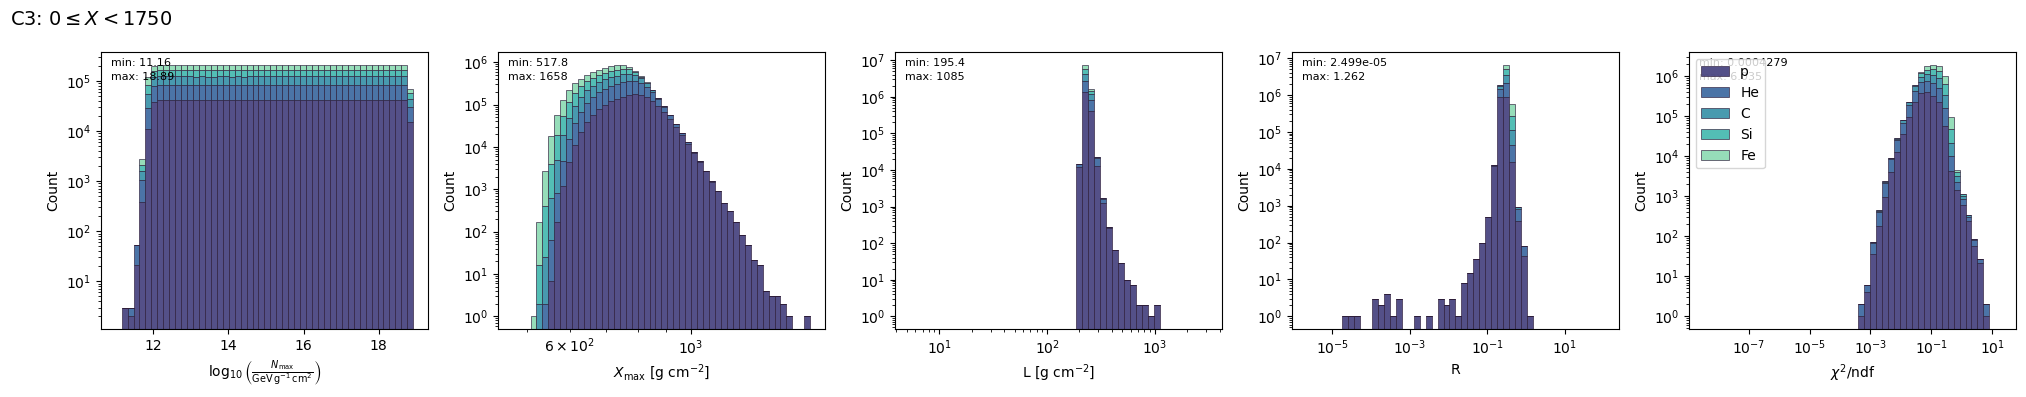

In [3]:
for cut in xfirst.config.cuts:
  fits = xfirst.data.load_fits('data', cut = cut, datasets = 'train', drop_bad = True)
  fig = xfirst.viz.draw_fit_parameters(fits, pallete = 'mako', limits = limits)
  fig.suptitle(f'{cut.name}: ${cut.min_depth} \leq X < {cut.max_depth}$', fontsize = 14, x = 0.03)
  fig.tight_layout()